<a href="https://colab.research.google.com/github/PatrickRuan/2nd-ML100Days/blob/master/Day100_transfer_learning_HW%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [0]:
root = 'drive/My Drive/'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 1 dim')

x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 1),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 1 dim


In [13]:
x_train=x_train/255.
x_test=x_test/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 10 dim')


x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 10),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 10 dim


In [0]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# 影像大小
IMAGE_SIZE = (32, 32)

# 影像類別數
NUM_CLASSES = 10

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 10

# 模型輸出儲存的檔案
WEIGHTS_FINAL = root+'ColabOK/model-resnet50-final.h5'



# 以訓練好的 ResNet50 為基礎來建立模型，
# 捨棄 ResNet50 頂層的 fully connected layers
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())

# 訓練模型
history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

In [0]:
import matplotlib.pyplot as plt
def call_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, label='Training acc')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

start 11
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.4119 - acc: 0.5161 - val_loss: 2.0444 - val_acc: 0.2856
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.3272 - acc: 0.5476 - val_loss: 1.7592 - val_acc: 0.3901
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.2408 - acc: 0.5757 - val_loss: 1.5026 - val_acc: 0.4936
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.1687 - acc: 0.5994 - val_loss: 1.3190 - val_acc: 0.5512
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.0941 - acc: 0.6264 - val_loss: 1.2305 - val_acc: 0.5867
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.0348 - acc: 0.6464 - val_loss: 1.1748 - val_acc: 0.6057
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.9758 - acc: 0.6678 - val

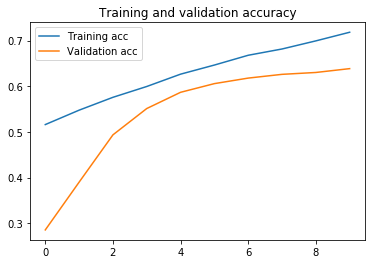

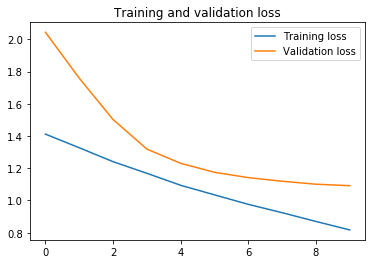

start 21
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.7741 - acc: 0.7337 - val_loss: 1.0754 - val_acc: 0.6431
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.7290 - acc: 0.7503 - val_loss: 1.0668 - val_acc: 0.6485
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6849 - acc: 0.7680 - val_loss: 1.0604 - val_acc: 0.6527
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6375 - acc: 0.7815 - val_loss: 1.0575 - val_acc: 0.6550
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6007 - acc: 0.7967 - val_loss: 1.0527 - val_acc: 0.6584
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.5610 - acc: 0.8101 - val_loss: 1.0517 - val_acc: 0.6596
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.5271 - acc: 0.8199 - val

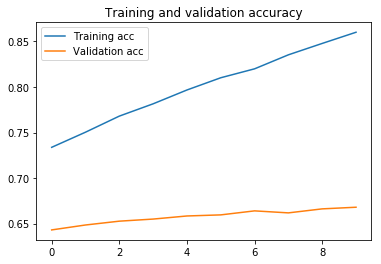

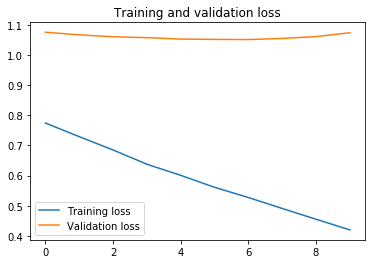

start 31
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3948 - acc: 0.8692 - val_loss: 1.0845 - val_acc: 0.6709
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3633 - acc: 0.8808 - val_loss: 1.0912 - val_acc: 0.6699
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3320 - acc: 0.8906 - val_loss: 1.1015 - val_acc: 0.6747
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3099 - acc: 0.9000 - val_loss: 1.1122 - val_acc: 0.6758
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2857 - acc: 0.9088 - val_loss: 1.1262 - val_acc: 0.6773
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2670 - acc: 0.9144 - val_loss: 1.1508 - val_acc: 0.6779
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2441 - acc: 0.9234 - val

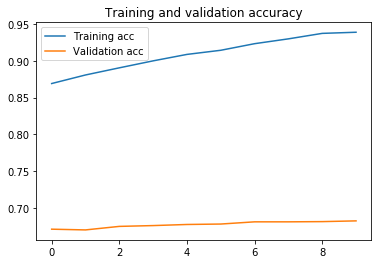

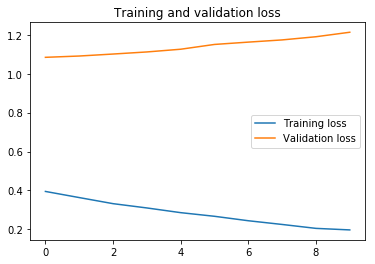

start 41
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1767 - acc: 0.9457 - val_loss: 1.2309 - val_acc: 0.6822
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1639 - acc: 0.9512 - val_loss: 1.2496 - val_acc: 0.6828
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1518 - acc: 0.9549 - val_loss: 1.2654 - val_acc: 0.6826
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1369 - acc: 0.9605 - val_loss: 1.2868 - val_acc: 0.6837
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1277 - acc: 0.9632 - val_loss: 1.3116 - val_acc: 0.6826
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1184 - acc: 0.9672 - val_loss: 1.3240 - val_acc: 0.6832
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1100 - acc: 0.9696 - val

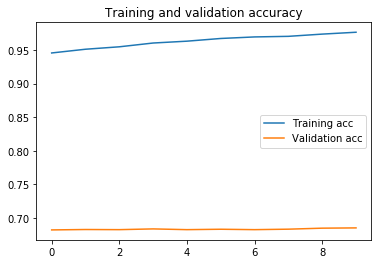

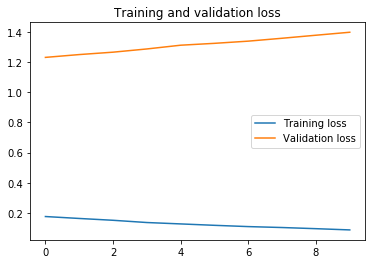

start 51
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0830 - acc: 0.9782 - val_loss: 1.4206 - val_acc: 0.6857
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0788 - acc: 0.9797 - val_loss: 1.4338 - val_acc: 0.6852
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0746 - acc: 0.9806 - val_loss: 1.4503 - val_acc: 0.6869
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0724 - acc: 0.9815 - val_loss: 1.4680 - val_acc: 0.6857
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0676 - acc: 0.9819 - val_loss: 1.4909 - val_acc: 0.6876
Epoch 6/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.0623 - acc: 0.9835 - val_loss: 1.5078 - val_acc: 0.6878
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0566 - acc: 0.9859 - val

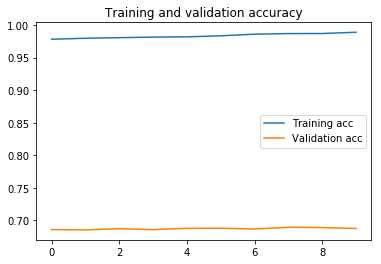

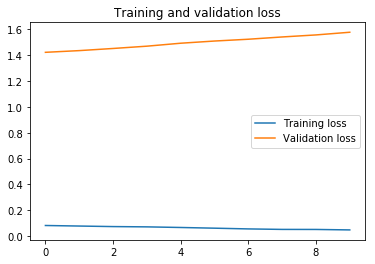

In [33]:
# 訓練模型  加碼
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {11+i*10}')
  fname = 'model-resnet50-final'+str(11+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history)
  

### We found around epoch #26, #27, the loss was getting lower, even accuracy was increasing.
### to select _21.h5 or _31.h5 is a good guess, check them later

In [40]:

i=2
fname = 'model-resnet50-final'+str(1+i*10)+'.h5'
WEIGHTS_FINAL = root+'ColabOK/'+fname

net_final.load_weights(WEIGHTS_FINAL)
net_final.evaluate(x_test,y_test)
# 21: [1.0819940867424012, 0.6686]
# 31: [1.2207230070114137, 0.6762]
# 51: [1.5665882215499878, 0.6862]
# In face, we could find these data from history, if we have append them into a list

10000/10000 [==============================] - 11s 1ms/sample - loss: 1.0820 - acc: 0.6686


[1.0819940867424012, 0.6686]

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen.fit(x_train)

 
  
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {1+i*10}')
  fname = 'model-resnet50-final-AR'+str(1+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)
  


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start 1
Epoch 1/10
97/97 [==============================] - 102s 1s/step - loss: 2.8544 - acc: 0.1033 - val_loss: 2.5934 - val_acc: 0.0972
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.5863 - acc: 0.1089 - val_loss: 2.6012 - val_acc: 0.1060
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.4672 - acc: 0.1186 - val_loss: 2.4974 - val_acc: 0.1063
Epoch 4/10
97/97 [==============================] - 56s 576ms/step - loss: 2.4063 - acc: 0.1236 - val_loss: 2.4386 - val_acc: 0.1081
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.3625 - acc: 0.1268 - val_loss: 2.4126 - val_acc: 0.1106
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.3413 - acc: 0.1289 - val_loss: 2.4120 - val_acc: 0.1113
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.3239 - acc: 0.1310 - val_loss: 2.4079 - val_acc: 0.1169
Epoch 8/10
97/97 [==============================] - 56s 577ms/s

In [0]:
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {51+i*10}')
  fname = 'model-resnet50-final-AR'+str(51+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)